<a href="https://colab.research.google.com/github/kichkiro/42/blob/main/workshops/machine_learning/2nd_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- like a computer vision problem! 

Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Import TensorFlow.

In [14]:
%%bash
pip3 install --upgrade pip
pip3 install tensorflow
pip3 install numpy
pip3 install matplotlib

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. 

Each image is associated with a label as shown in this table:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load dataset by writing this code:


In [16]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

By calling `load_data()` on ***fmnist*** (the name we gave to our data) it will give you two tuples with two lists each. 

These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [17]:
# Load the training and test split of the Fashion MNIST dataset (training and test images and labels)
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

Let's print a **training image** (both as an image and a numpy array), and a **training label** to see the way they look. 

Change Index just for fun: take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

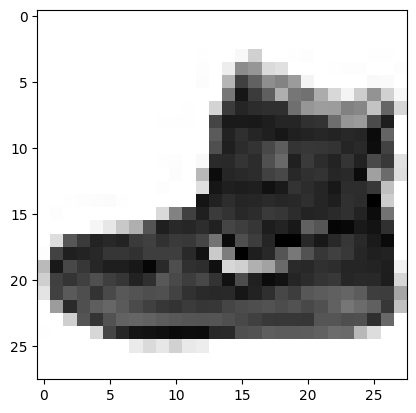

In [18]:
# set index, You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth = 340)

# Print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index], cmap = 'Greys')


Values in the number are between 0 and 255. If you are training a neural network especially in image processing, it will usually learn better if you scale all values to between 0 and 1. It's a process called **_normalization_**. In Python, it's easy to normalize an array without looping. You do it like this:

In [19]:
# Normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

Why the dataset is split into two: training and testing? 

To have 1 set of data for training, and then another set of data that the model hasn't yet seen. 

The test data will be used to evaluate how good it would be at classifying values.

Design the model!

In [20]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

[Sequential](https://keras.io/api/models/sequential/): Defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Our images were a 28x28 pixel matrix. **Flatten** just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

It only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class.

Now we compile the model. 

We have Optimizer and loss function as before 

You train it by calling **model.fit()** asking it to fit your training data to your training labels. 

It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [21]:
#complie the model with optimizer, loss and metrics
#fit the trining images and labels to the model, and set epochs to 5
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4987 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3765 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3374 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3123 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2949 - accuracy: 0.8914


Once it's done training -- you should see an accuracy value at the end of the final epoch.

This tells you have well the classification has been done on traning data.

This means that it figured out a pattern match between the image and the labels that worked around %% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

Now let's see how will our model perform on never seen data. This test tells us more about our model.

We will now fit the test data on the model.

We can call **model.evaluate()** with this test dataset as inputs and it will report back the loss and accuracy of the model.

In [22]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 668us/step - loss: 0.3519 - accuracy: 0.8720


[0.3518724739551544, 0.871999979019165]

As you can see here the accuracy is lower, and loss is higher. This is normal and expected as this is the data our model has never seen.

The main goal of the data scientes is to get accuarcy higher and loss lower by tweaking the models.  